In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
#from sklearn.preprocessing import Imputer

In [3]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df=df.drop(columns=['Name','Ticket','Cabin'],axis=1)

In [ ]:
#sns.scatterplot(x='Cabin',y='Survived',kind='scatter')
#plt.show()

In [9]:
#changing categorial object into numeric form
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [10]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder
#df['Cabin']=le.fit_transform(df['Cabin'].astype(str))

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.529742
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


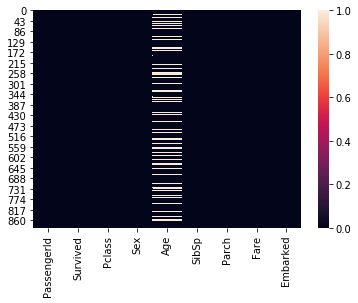

In [12]:
sns.heatmap(df.isnull())

In [13]:
#handling null values using imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
df["Age"]=imp.fit_transform(df['Age'].values.reshape(-1,1))

df['Age']=pd.DataFrame(df['Age'],dtype=int)

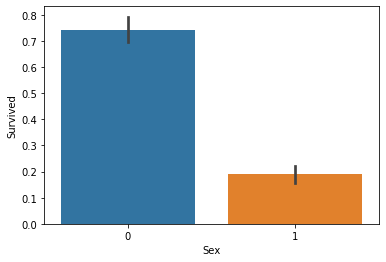

In [14]:
sns.barplot(x='Sex',y='Survived',data= df)

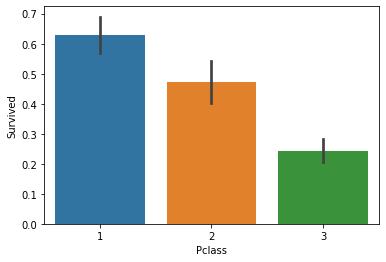

In [15]:
sns.barplot(x='Pclass',y='Survived',data= df)


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

PassengerId       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Survived       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Pclass          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Sex            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Age            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.133621x0.343182)
Parch             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Fare               AxesSubplot(0.44569,0.125;0.133621x0.343182)
Embarked          AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

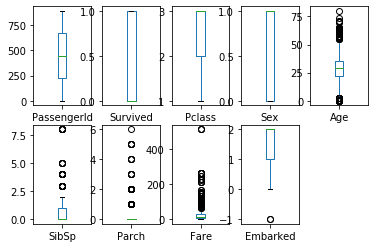

In [18]:
df.plot(kind='box',subplots=True,layout=(2,5))

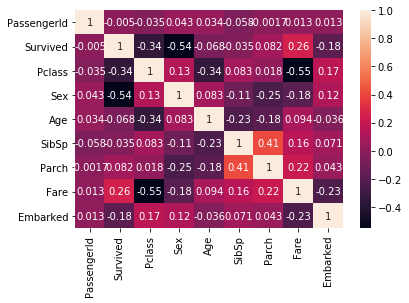

In [19]:
sns.heatmap(df.corr(),annot=True)

In [22]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final
print(df.shape)

(891, 9)
(818, 9)
(818, 9)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  818 non-null    int64  
 1   Survived     818 non-null    int64  
 2   Pclass       818 non-null    int64  
 3   Sex          818 non-null    int8   
 4   Age          818 non-null    int32  
 5   SibSp        818 non-null    int64  
 6   Parch        818 non-null    int64  
 7   Fare         818 non-null    float64
 8   Embarked     818 non-null    int8   
dtypes: float64(1), int32(1), int64(5), int8(2)
memory usage: 49.5 KB


In [24]:
df.skew()

PassengerId    0.003468
Survived       0.457268
Pclass        -0.639191
Sex           -0.671699
Age            0.338520
SibSp          1.975774
Parch          2.118544
Fare           2.342849
Embarked      -1.273629
dtype: float64

In [30]:
# handling skewness
from scipy.stats import boxcox
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [31]:
df.skew()

PassengerId    0.003468
Survived       0.457268
Pclass        -0.639191
Sex           -0.671699
Age            0.338520
SibSp          0.974387
Parch          1.609855
Fare           0.198492
Embarked      -1.273629
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201E5B400C8>,
      dtype=object)

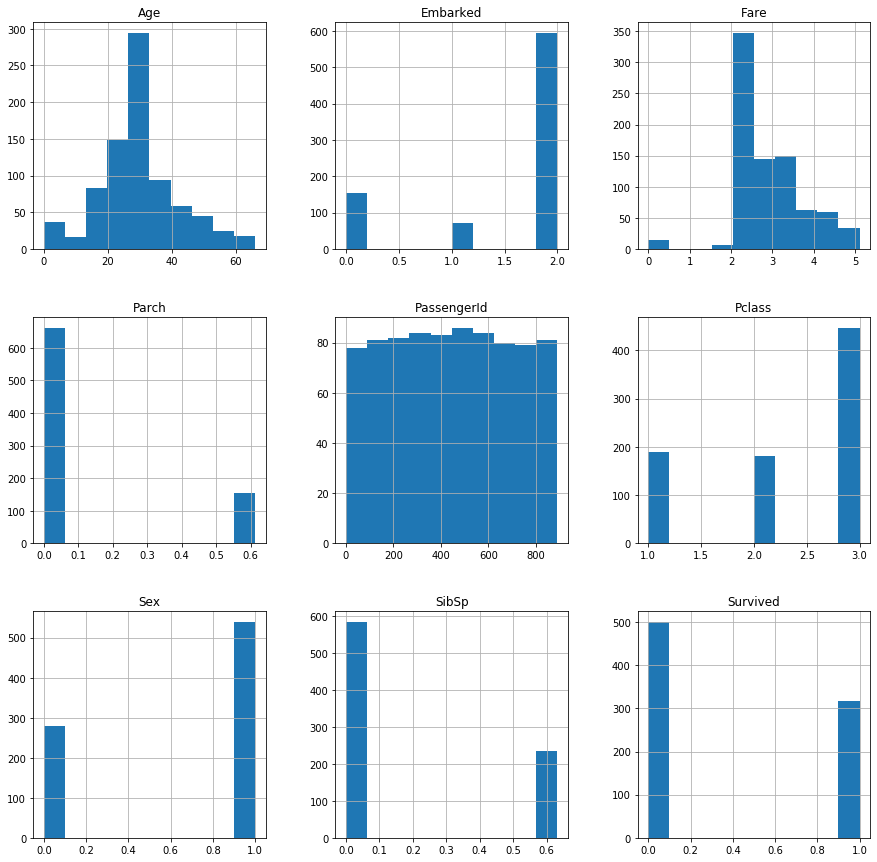

In [36]:
df.hist(figsize=(15,15))

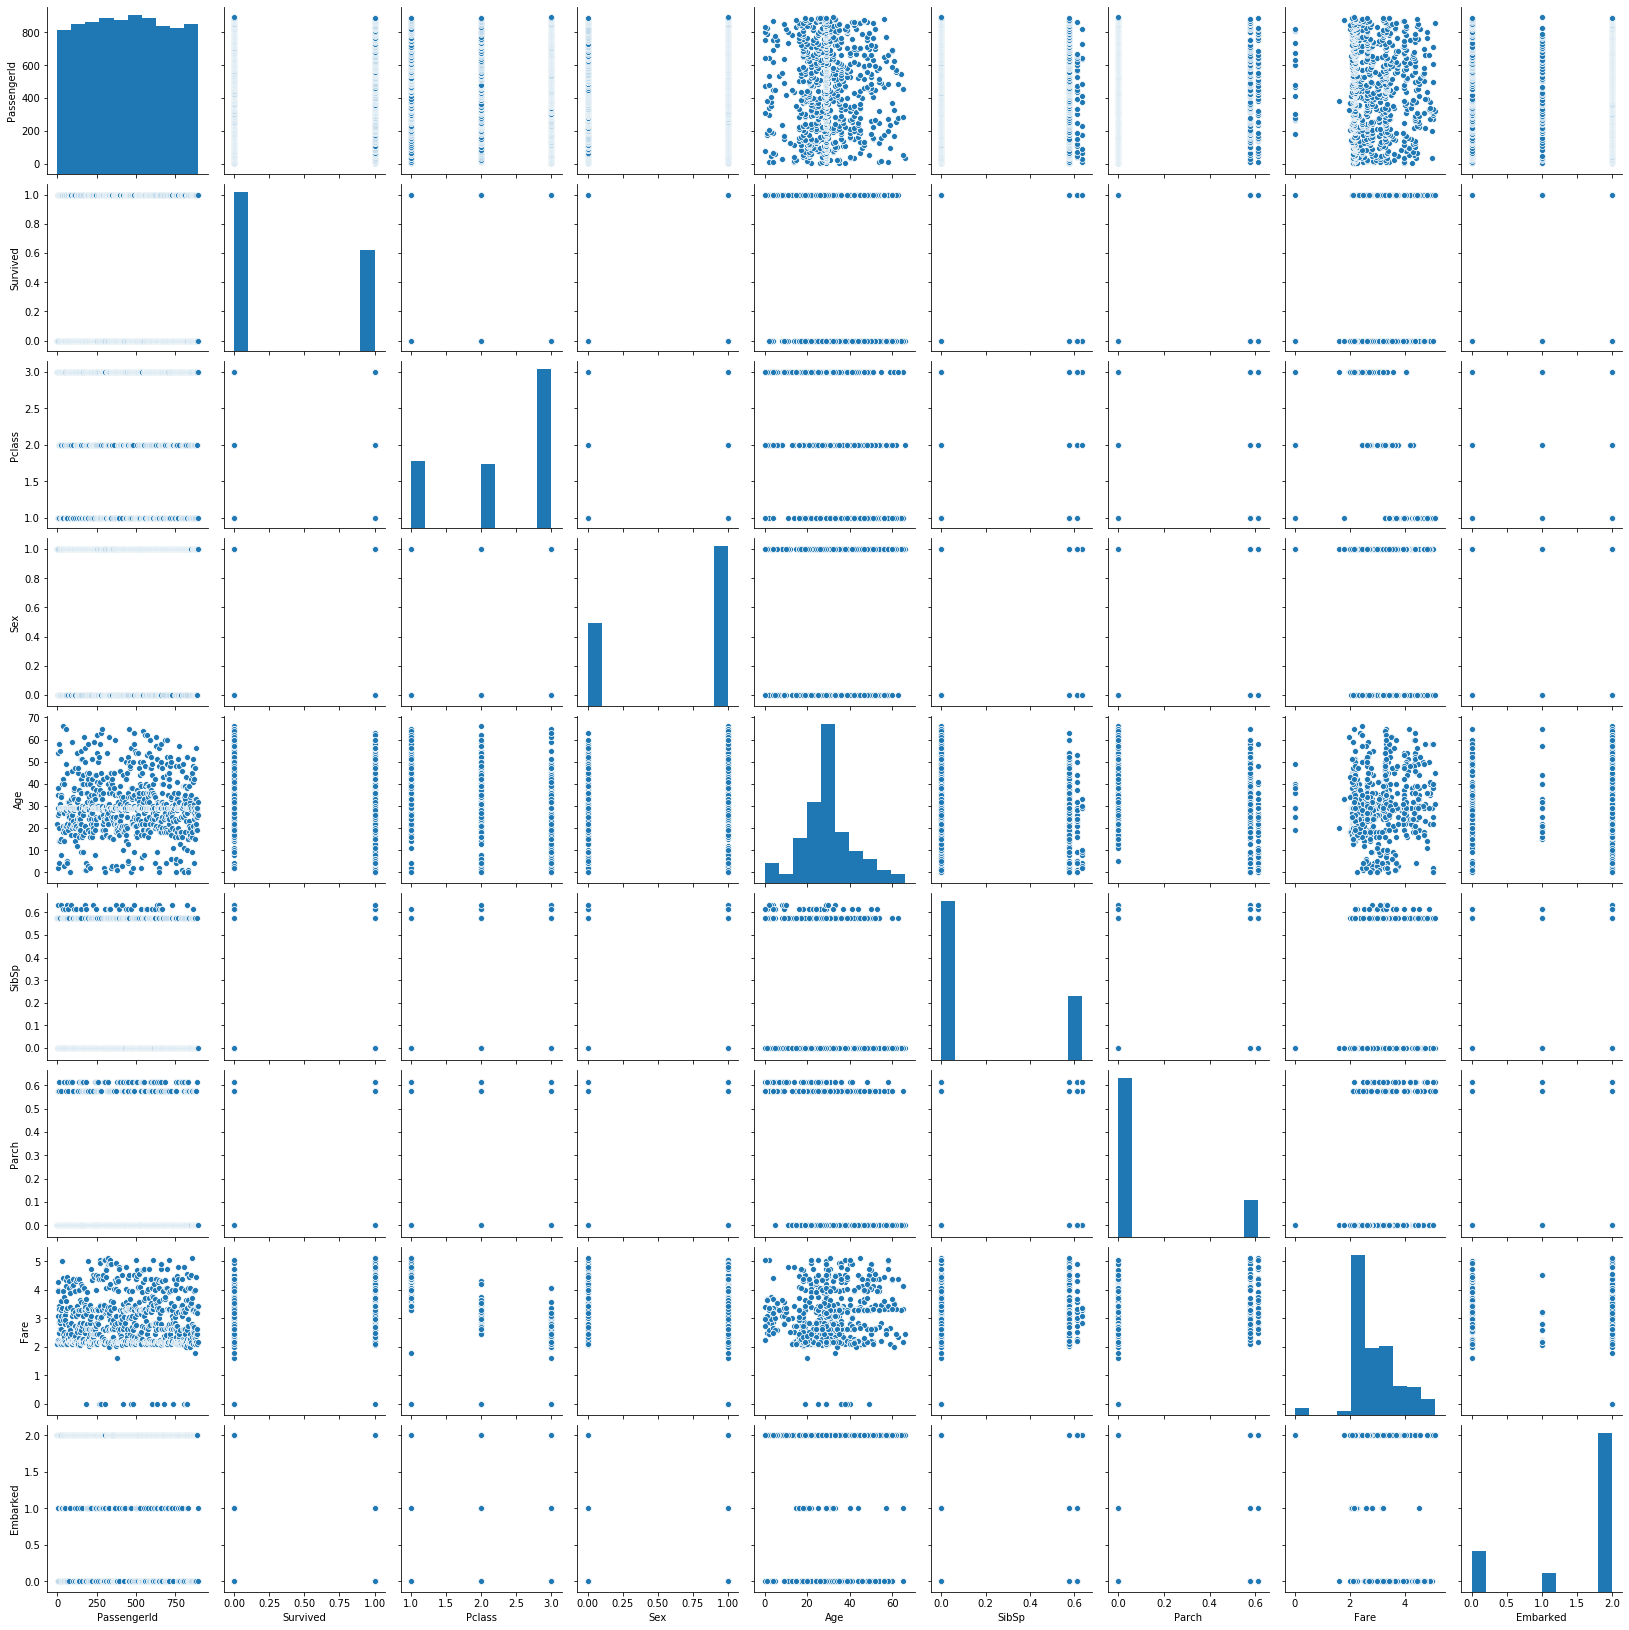

In [37]:
sns.pairplot(df)

In [55]:
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
dfx=df.drop("Survived",axis=1)
dfx.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22,0.575643,0.0,2.110213,2
1,2,1,0,38,0.575643,0.0,4.280593,0
2,3,3,0,26,0.000000,0.0,2.188856,2
3,4,1,0,35,0.575643,0.0,3.990834,2
4,5,3,1,35,0.000000,0.0,2.202765,2


In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
print(x.head())
print(x.skew())

   PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0    -1.746309  0.831666  0.719462 -0.625709  1.547040 -0.485161 -0.837235   
1    -1.742382 -1.593656 -1.389928  0.694504  1.547040 -0.485161  1.592155   
2    -1.738455  0.831666 -1.389928 -0.295656 -0.634527 -0.485161 -0.749206   
3    -1.734529 -1.593656 -1.389928  0.446964  1.547040 -0.485161  1.267817   
4    -1.730602  0.831666  0.719462  0.446964 -0.634527 -0.485161 -0.733638   

   Embarked  
0  0.584117  
1 -1.950672  
2  0.584117  
3  0.584117  
4  0.584117  


In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9,stratify=y)

In [46]:
print(x_train.shape,x_test.shape)

(572, 8) (246, 8)


In [47]:
print(y_train.shape,y_test.shape)

(572,) (246,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [50]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score =  0.7804878048780488


Cross_Val_Score =  0.8007226738934057


roc_auc_score =  0.746875


classification_report
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       150
           1       0.79      0.59      0.68        96

    accuracy                           0.78       246
   macro avg       0.78      0.75      0.76       246
weighted avg       0.78      0.78      0.77       246



[[135  15]
 [ 39  57]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max

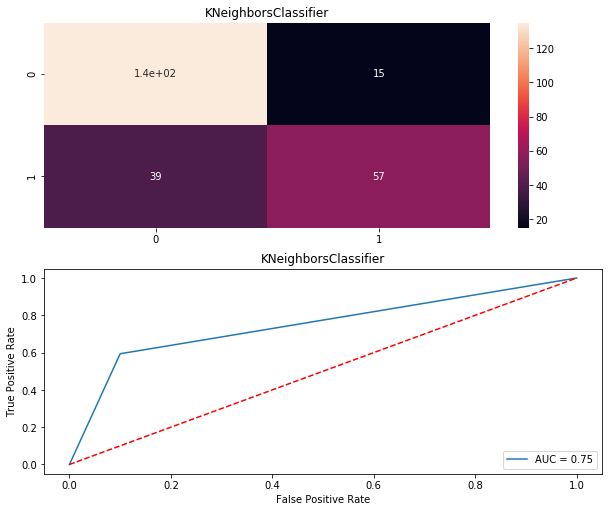

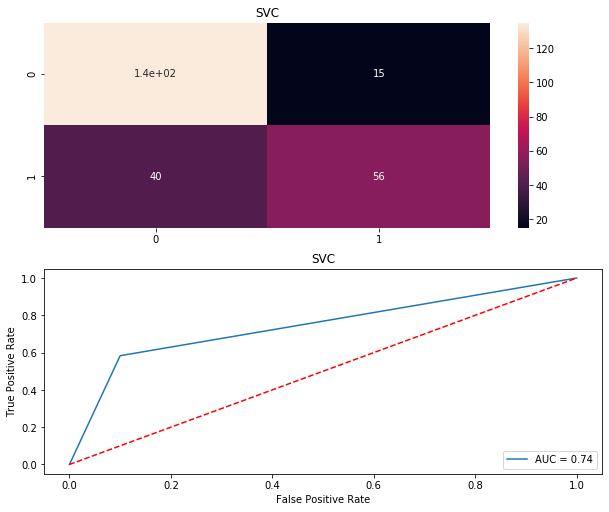

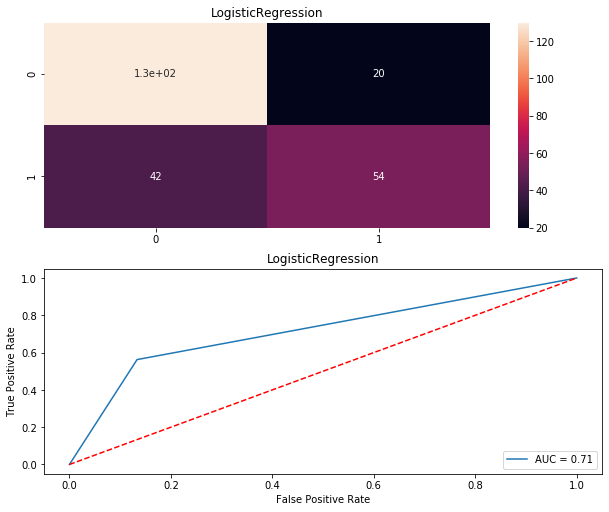

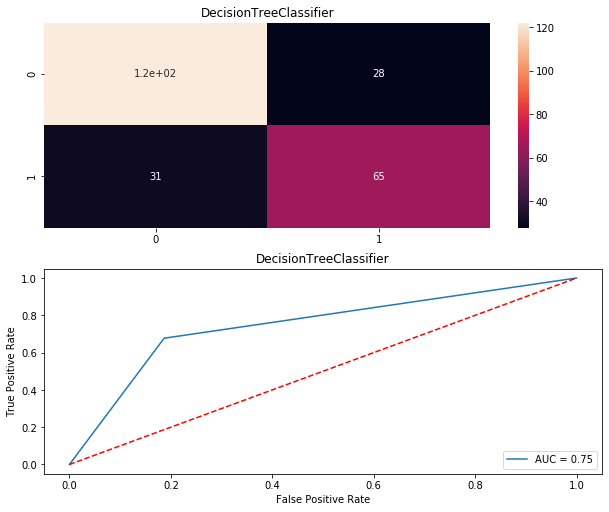

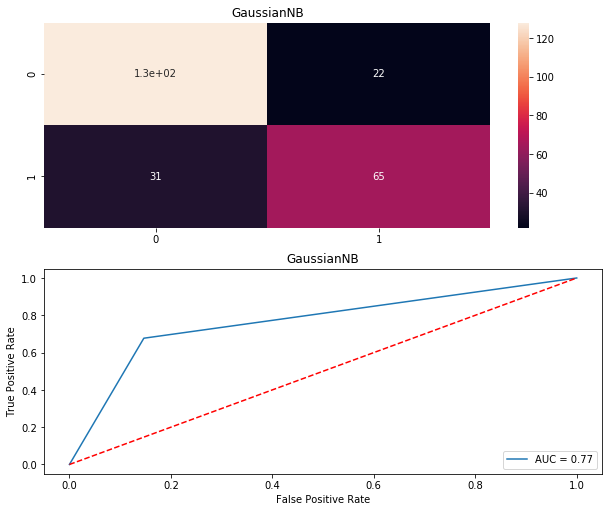

In [52]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [53]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,78.048780,80.072267,74.687500
1,SVC,77.642276,80.689551,74.166667
2,LogisticRegression,74.796748,78.608853,71.458333
3,DecisionTreeClassifier,76.016260,74.101174,74.520833
4,GaussianNB,78.455285,76.906052,76.520833


In [54]:
from sklearn.externals import joblib

In [56]:
joblib.dump(GNB,'titanic.csv')

['titanic.csv']

In [57]:
model=joblib.load('titanic.csv')

In [58]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1], dtype=int64)